# Simple Linear Regression

## Project Overview
In this project, I implement linear regression from scratch using the main mathematical formula. The goal is to understand how linear regression works at a fundamental level by implementing it manually rather than using a library.

## What is Linear Regression?
Linear regression is a method for finding the best-fitting straight line through a set of data points. The line is defined by the equation:
- **y = w₁x + w₀**
  - w₁: slope of the line
  - w₀: y-intercept (bias term)

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For data visualization

In [2]:
# Generate synthetic data for linear regression
# Target formula: y = 5.2x + 6.3 (with added noise)

def datacreator(m, h, n):  # m: slope, h: y-intercept, n: number of data points
    noise = 5.0  # Standard deviation of the noise to add randomness
    # Create evenly spaced x values from 0 to 100
    x = np.arange(0, 100, 100/n)
    # Generate y values using the linear formula plus random noise
    y = m * x + h + np.random.randn(n) * noise
    return x, y

# Set the true parameters of our linear model
m = 5.2  # True slope
h = 6.3  # True y-intercept
n = 100000  # Number of data points to generate

# Generate the dataset
x, y = datacreator(m, h, n)

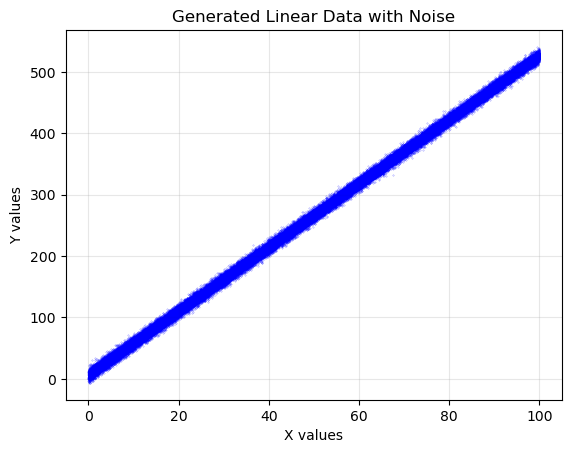

In [5]:
# Visualize the generated data
plt.plot(x, y, 'b.', alpha=0.5, markersize=0.5)  # Plot as blue dots with transparency
plt.xlabel('X values')  # Label for x-axis
plt.ylabel('Y values')  # Label for y-axis
plt.title('Generated Linear Data with Noise')  # Plot title
plt.grid(True, alpha=0.3)  # Add grid for better readability
plt.show()

## Data Visualization
As you can see, it's simple linear data with some noise. We'll use this dataset to test our linear regression implementation and see if we can recover the original parameters (slope = 5.2, intercept = 6.3).

In [6]:
# Linear Regression Implementation using Least Squares Method
# This function calculates the optimal slope (w₁) and intercept (w₀) using the formula:
# w₁ = (n·Σ(xy) - Σ(x)·Σ(y)) / (n·Σ(x²) - (Σ(x))²)
# w₀ = (Σ(y) - w₁·Σ(x)) / n

def w1w0(x, y):
    # Calculate necessary sums for the formula
    sum_x = np.sum(x)      # Sum of all x values: Σ(x)
    sum_y = np.sum(y)      # Sum of all y values: Σ(y)
    sigxy = np.sum(x * y)  # Sum of x*y products: Σ(xy)
    sigx2 = np.sum(x**2)   # Sum of x squared: Σ(x²)
    num = len(x)           # Number of data points: n
    
    # Calculate slope (w₁) using the least squares formula
    w_1 = (num * sigxy - sum_x * sum_y) / (num * sigx2 - sum_x**2)
    
    # Calculate intercept (w₀) using the mean formula
    w_0 = (sum_y - w_1 * sum_x) / num
    
    return w_1, w_0

In [7]:
# Apply linear regression to estimate the slope and intercept
w1, w0 = w1w0(x, y)

In [15]:
## Results and Analysis

In [8]:
# Display the estimated parameters
print("=" * 50)
print("LINEAR REGRESSION RESULTS")
print("=" * 50)
print(f"\nEstimated Slope (w₁):     {w1:.6f}")
print(f"True Slope:                {m:.6f}")
print(f"Error:                     {abs(w1 - m):.6f}")
print(f"\nEstimated Intercept (w₀):  {w0:.6f}")
print(f"True Intercept:            {h:.6f}")
print(f"Error:                     {abs(w0 - h):.6f}")
print("=" * 50)

LINEAR REGRESSION RESULTS

Estimated Slope (w₁):     5.199518
True Slope:                5.200000
Error:                     0.000482

Estimated Intercept (w₀):  6.332781
True Intercept:            6.300000
Error:                     0.032781


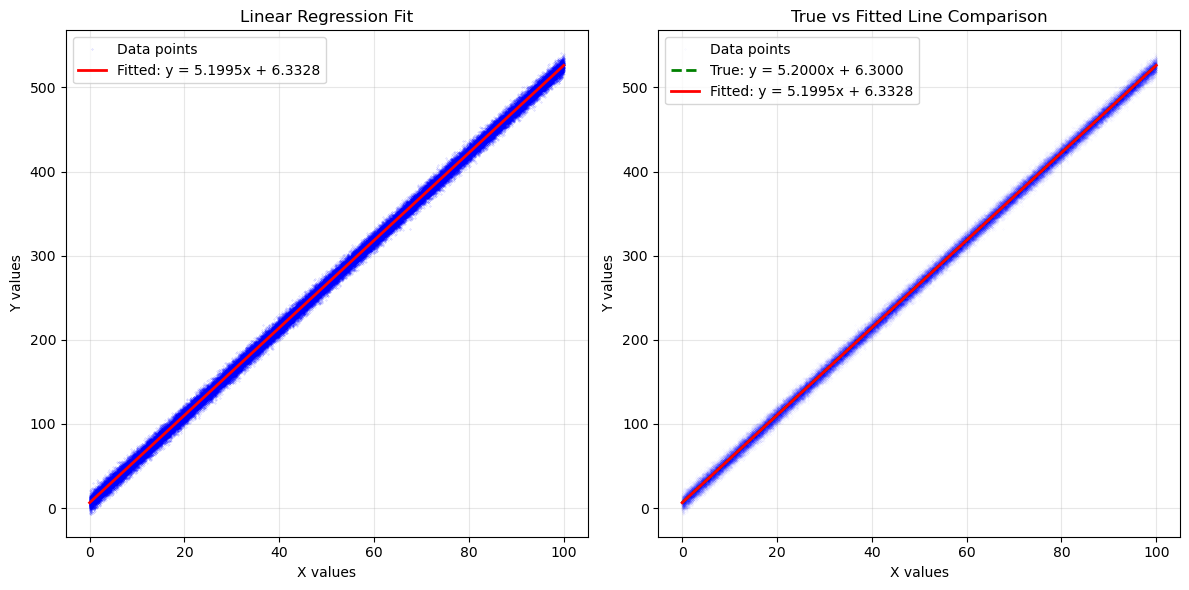

In [9]:
# Visualize the data with the fitted regression line
plt.figure(figsize=(12, 6))

# Plot 1: Data points with fitted line
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b.', alpha=0.3, markersize=0.5, label='Data points')
# Generate fitted line
x_line = np.linspace(x.min(), x.max(), 100)
y_fitted = w1 * x_line + w0
plt.plot(x_line, y_fitted, 'r-', linewidth=2, label=f'Fitted: y = {w1:.4f}x + {w0:.4f}')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Comparison of true vs fitted line
plt.subplot(1, 2, 2)
plt.plot(x, y, 'b.', alpha=0.1, markersize=0.3, label='Data points')
# True line
y_true = m * x_line + h
plt.plot(x_line, y_true, 'g--', linewidth=2, label=f'True: y = {m:.4f}x + {h:.4f}')
# Fitted line
plt.plot(x_line, y_fitted, 'r-', linewidth=2, label=f'Fitted: y = {w1:.4f}x + {w0:.4f}')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('True vs Fitted Line Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Model Evaluation

The linear regression algorithm successfully estimated the parameters of the best-fitting line through the data points. 

**Key Observations:**
- The estimated values should be close to the true values (slope = 5.2, intercept = 6.3)
- Some variation is expected due to the noise in the data
- With a large sample size (n = 100,000), the estimates should be very close to the true parameters
- The least squares method minimizes the sum of squared residuals between the data points and the fitted line

**Mathematical Formula Used:**
- **Slope (w₁)**: `(n·Σ(xy) - Σ(x)·Σ(y)) / (n·Σ(x²) - (Σ(x))²)`
- **Intercept (w₀)**: `(Σ(y) - w₁·Σ(x)) / n`

Where:
- n = number of data points
- Σ(x) = sum of all x values
- Σ(y) = sum of all y values
- Σ(xy) = sum of x·y products
- Σ(x²) = sum of x squared
